In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data Processing / Exploration

In [2]:
# Load dataset
filename = "dataset/survey_results_public.csv"
df = pd.read_csv(filename, low_memory=False)

In [3]:
# Look at df shape and other info
print("DF Shape", df.shape)
print("Columns:", df.columns.tolist())
df.info()

DF Shape (98855, 129)
Columns: ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'C

In [10]:
# See what percent of each column is missing, sort by those with most missing
missing_count = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
missing_df = (
    pd.DataFrame({"missing_count": missing_count, "missing_pct": missing_pct})
    .sort_values(by="missing_count", ascending=False)
    .head(20)
)
print(missing_df)

                            missing_count  missing_pct
TimeAfterBootcamp                   92203        93.27
MilitaryUS                          83074        84.04
HackathonReasons                    73164        74.01
FormalEducation                     69207        70.01
ErgonomicDevices                    64797        65.55
AdBlockerReasons                    61110        61.82
StackOverflowJobsRecommend          60538        61.24
JobEmailPriorities1                 52642        53.25
JobEmailPriorities2                 52642        53.25
JobEmailPriorities3                 52642        53.25
JobEmailPriorities5                 52642        53.25
JobEmailPriorities4                 52642        53.25
JobEmailPriorities6                 52642        53.25
JobEmailPriorities7                 52642        53.25
ConvertedSalary                     51153        51.75
JobContactPriorities1               50149        50.73
JobContactPriorities5               50149        50.73
JobContact

In [5]:
# Check to make sure there are no duplicate rowws
duplicates = df.duplicated().sum()
print(duplicates)

0


In [40]:
# Print other useful data info
# df.describe()
df.describe(include=[np.number])
# df.describe(include=[object, 'category'])

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


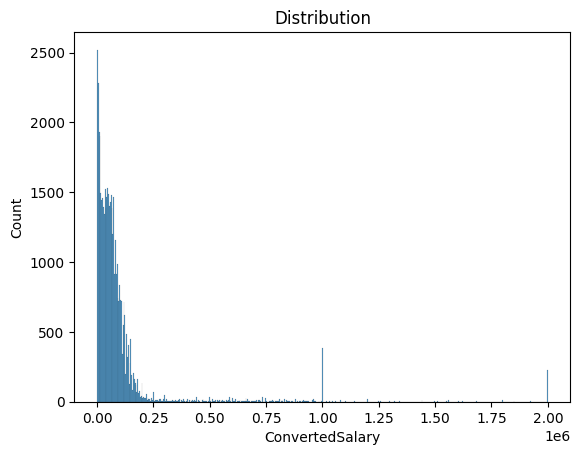

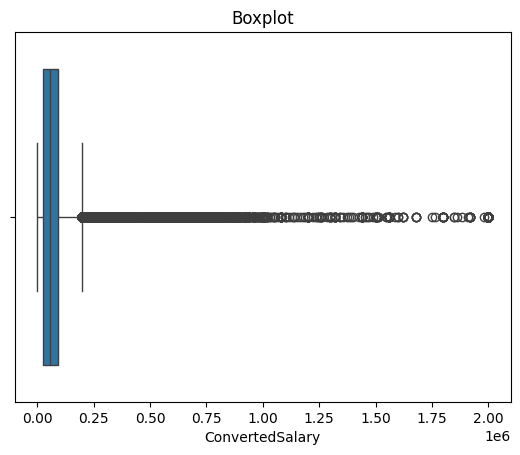

In [7]:
# Check what distribution salary has
# Not sure if I really need to do this but why not
sns.histplot(df["ConvertedSalary"])
plt.title("Distribution")
plt.show()

sns.boxplot(x=df["ConvertedSalary"])
plt.title("Boxplot")
plt.show()

## Plots I'll probably use in my report's EDA

In [12]:
key_cols = [
    "ConvertedSalary",
    "YearsCoding",
    "FormalEducation",
    "HoursComputer",
    "Country",
    "JobSatisfaction"
]
eda_df = df[key_cols]
eda_df_clean = eda_df.dropna()  # drop rows missing any of the key variables

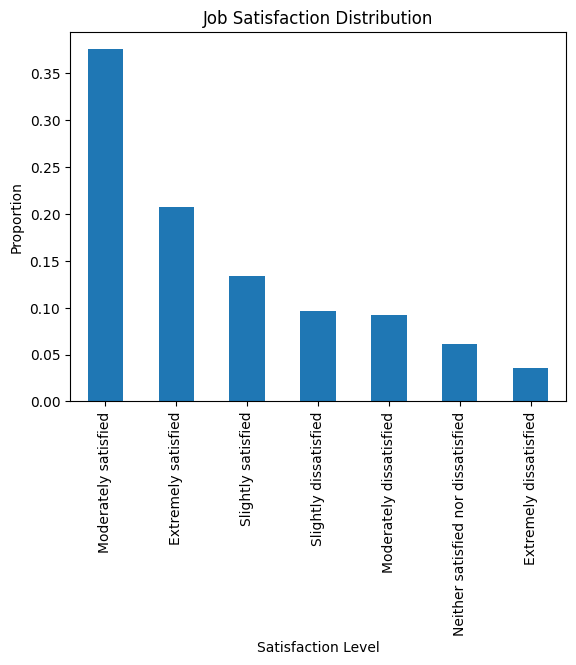

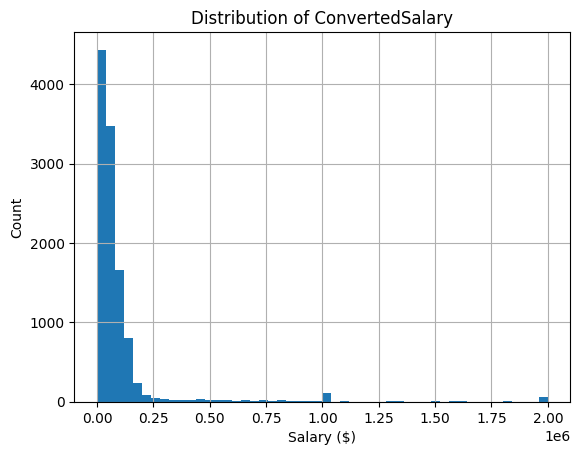

<Figure size 640x480 with 0 Axes>

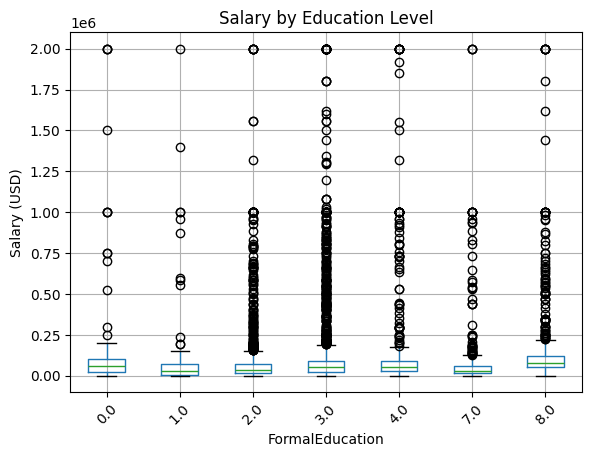

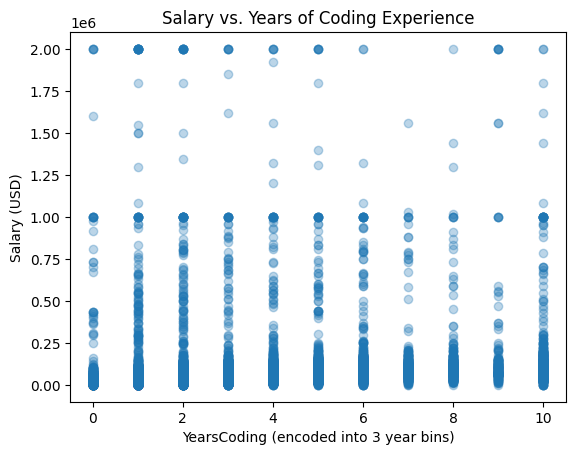

In [42]:
# job Satisfaction distribution
plt.figure()
eda_df_clean["JobSatisfaction"].value_counts(normalize=True).plot(kind="bar")
plt.title("Job Satisfaction Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Proportion")
plt.show()

# Histogram of ConvertedSalary
plt.figure()
eda_df_clean["ConvertedSalary"].hist(bins=50)
plt.title("Distribution of ConvertedSalary")
plt.xlabel("Salary ($)")
plt.ylabel("Count")
plt.show()

# Boxplot of Salary by FormalEducation
plt.figure()
eda_df_clean.boxplot(column="ConvertedSalary", by="FormalEducation", rot=45)
plt.title("Salary by Education Level")
plt.suptitle("")
plt.ylabel("Salary (USD)")
plt.show()

# Scatterplot of Salary vs years coding
plt.figure()
plt.scatter(
    eda_df_clean["YearsCoding"], eda_df_clean["ConvertedSalary"], alpha=0.3
)
plt.title("Salary vs. Years of Coding Experience")
plt.xlabel("YearsCoding (encoded into 3 year bins)")
plt.ylabel("Salary (USD)")
plt.show()

# # Bar chart of Top 10 Countries by Response Count
# top_countries = eda_df_clean["Country"].value_counts().head(10)
# plt.figure()
# top_countries.plot(kind="bar")
# plt.title("Top 10 Countries by Number of Respondents")
# plt.xlabel("Country")
# plt.ylabel("Count")
# plt.show()

# Model Implementation

In [ ]:
# # Re-Load dataset
# filename = "dataset/survey_results_public.csv"
# df = pd.read_csv(filename, low_memory=False)

# # Encode categorical data
# education_encoding_map = {
#     "I never completed any formal education": 0,
#     "Primary/elementary school": 1,
#     "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": 2,
#     "Some college/university study without earning a degree": 3,
#     "Associate degree": 4,
#     "Bachelor's degree (BA, BS, B.Eng., etc.)": 5,
#     "Master's degree (MA, MS, M.Eng., MBA, etc.)": 6,
#     "Professional degree (JD, MD, etc.)": 7,
#     "Other doctoral degree (Ph.D, Ed.D., etc.)": 8,
# }
# years_coding_encoding_map = {
#     "0-2 years": 0,
#     "3-5 years": 1,
#     "6-8 years": 2,
#     "9-11 years": 3,
#     "12-14 years": 4,
#     "15-17 years": 5,
#     "18-20 years": 6,
#     "21-23 years": 7,
#     "24-26 years": 8,
#     "27-29 years": 9,
#     "30 or more years": 10,
# }
# hours_computer_encoding_mapping = {
#     "Less than 1 hour": 0,
#     "1 - 4 hours": 1,
#     "5 - 8 hours": 2,
#     "9 - 12 hours": 3,
#     "Over 12 hours": 4,
# }
# df["FormalEducation"] = df["FormalEducation"].map(education_encoding_map)
# df["YearsCoding"] = df["YearsCoding"].map(years_coding_encoding_map)
# df["HoursComputer"] = df["HoursComputer"].map(hours_computer_encoding_mapping)

# # Filter columns and remove NULLS
# cols = ["FormalEducation", "YearsCoding", "HoursComputer", "ConvertedSalary"]
# df_encoded = df[cols]
# df_encoded = df_encoded.dropna()

## PCA first

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# load dataset
filename = "dataset/survey_results_public.csv"
df = pd.read_csv(filename, low_memory=False)

# split X/y
X = df.drop(columns=["ConvertedSalary"])
y = df["ConvertedSalary"]
mask = y.notnull()
X, y = X[mask], y[mask]

# Make all columns not missing any data, 
# played with lower values a bit but this seems to work better
numeric_features = [
    c
    for c in X.select_dtypes(["int64", "float64"]).columns
    if X[c].notnull().mean() >= 1.0
]
categorical_feats = [
    c
    for c in X.select_dtypes(["object"]).columns
    if X[c].notnull().mean() >= 1.0
]

# build transformers with onehot encoding
num_pipe = Pipeline(
    [
        ("imputer", "passthrough"),  # or SimpleImputer(strategy='median')
        ("scaler", StandardScaler()),
    ]
)
cat_pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)
preproc = ColumnTransformer(
    [
        ("num", num_pipe, numeric_features),
        ("cat", cat_pipe, categorical_feats),
    ],
    remainder="drop",
)

# now full pipeline with PCA
# played with this value a lot, 
# using higher values like 0.9 left me with 150+ components still
pca_frac = 0.90 
pipe = Pipeline(
    [
        ("preproc", preproc),
        ("pca", PCA(n_components=pca_frac, svd_solver="full")),
    ]
)

# train/test
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=11)
Xtr_pca = pipe.fit_transform(Xtr)
Xte_pca = pipe.transform(Xte)

# output
print("PCA components = ", pipe.named_steps["pca"].n_components_)
print("Explained var = ", pipe.named_steps["pca"].explained_variance_ratio_.sum())

PCA components =  151
Explained var =  0.9004308367831563


## Implement Linear Regression

In [48]:
Xtr_pca = pipe.fit_transform(Xtr)
Xte_pca = pipe.transform(Xte)

# Convert to numpy arrays
X_train = np.array(Xtr_pca)
y_train = np.array(ytr)
X_test = np.array(Xte_pca)
y_test = np.array(yte)

In [49]:
# OLS (ordinary least squares) regression

# train OLS
XtX = X_train.T @ X_train
Xty = X_train.T @ y_train
w_ols = np.linalg.solve(XtX, Xty)

# predict
y_pred_ols = X_test @ w_ols

# metrics
rmse_ols = np.sqrt(np.mean((y_test - y_pred_ols) ** 2))
ss_res = np.sum((y_test - y_pred_ols) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_ols = 1 - ss_res / ss_tot

# output
print(f"OLS RMSE: {rmse_ols:.2f}")
print(f"OLS  R²: {r2_ols:.3f}")

OLS RMSE: 222757.66
OLS  R²: -0.146


In [50]:
# Ridge regression
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# function for training ridge
def train_ridge(X, y, alpha):
    n = X.shape[1]
    A = X.T @ X + alpha * np.eye(n)
    b = X.T @ y
    return np.linalg.solve(A, b)

# 
alphas = [0.01, 0.1, 1, 10, 100]
val_scores = {}
for a in alphas:
    w_r = train_ridge(X_tr, y_tr, a)
    y_val_pred = X_val @ w_r
    val_scores[a] = np.sqrt(np.mean((y_val - y_val_pred) ** 2))

best_alpha = min(val_scores, key=val_scores.get)
print("Validation RMSE by alpha = ", val_scores)
print("---Best alpha:", best_alpha)

Validation RMSE by alpha =  {0.01: np.float64(224582.59370948258), 0.1: np.float64(224582.43303567477), 1: np.float64(224580.9132886247), 10: np.float64(224573.1519758878), 100: np.float64(224747.21870211657)}
---Best alpha: 10


In [ ]:
# final ridge ???
w_ridge = train_ridge(X_train, y_train, best_alpha)
y_pred_ridge = X_test @ w_ridge

# RMSE and R^2 for ridge
rmse_ridge = np.sqrt(np.mean((y_test - y_pred_ridge) ** 2))
ss_res_r = np.sum((y_test - y_pred_ridge) ** 2)
r2_ridge = 1 - ss_res_r / ss_tot

# output
print(f"Ridge RMSE (a={best_alpha}): {rmse_ridge:.2f}")
print(f"Ridge  R²  (a={best_alpha}): {r2_ridge:.3f}")

Ridge RMSE (a=10): 222742.03
Ridge  R²  (a=10): -0.145


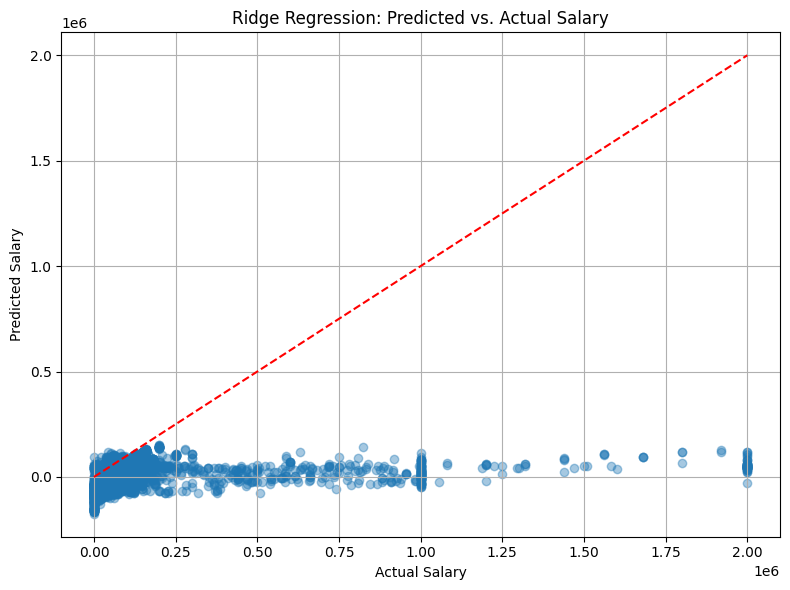

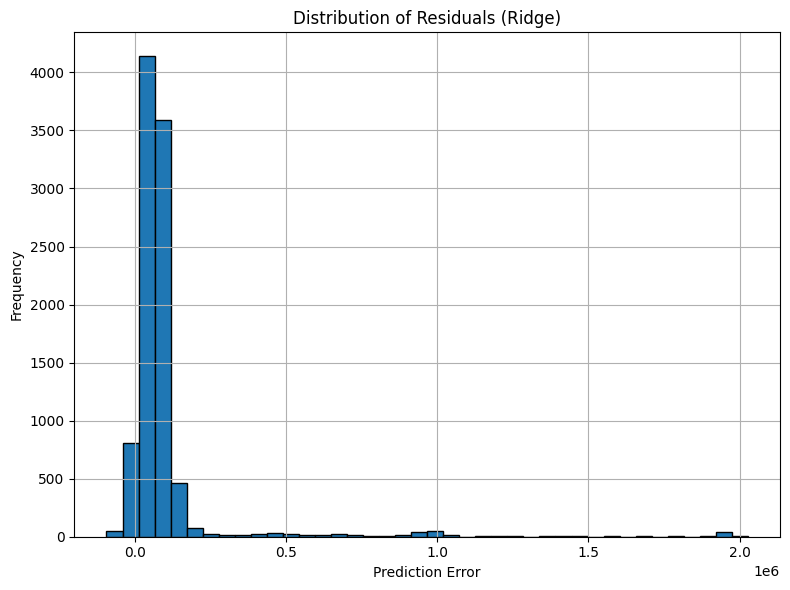

In [53]:
## RESULTS

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Ridge Regression: Predicted vs. Actual Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

# residual plot
residuals = y_test - y_pred_ridge
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=40, edgecolor="k")
plt.title("Distribution of Residuals (Ridge)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()